In [3]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Combined_WR.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_avg_depth_of_target', 'weighted_avg_avoided_tackles',
       'weighted_avg_caught_percent', 'weighted_avg_contested_catch_rate',
       'weighted_avg_contested_receptions', 'weighted_avg_contested_targets',
       'weighted_avg_declined_penalties', 'weighted_avg_drop_rate',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_fumbles',
       'weighted_avg_grades_hands_drop', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass_block', 'weighted_avg_grades_pass_route',
       'weighted_avg_inline_rate', 'weighted_avg_interceptions',
       'weighted_avg_longest', 'weighted_avg_pass_block_rate',
       'weighted_avg_pass_blocks', 'weighted_avg_pass_plays',
       'weighted_avg_penalties', 'weighted

In [6]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)

In [7]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       WR         5.419766        331.370639         17.0   
50   49ers  2020       WR         4.631685        605.449663         24.0   
70   49ers  2021       WR         4.416438        315.748468         18.0   
123  49ers  2022       WR         6.700288        253.620355         26.0   
12   Bears  2019       WR        15.531350        186.577541         20.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         24.0     63.513776    69.554946     27.90%  ...   
50         18.0     69.554946    71.292028      5.40%  ...   
70         26.0     71.292028    74.381042     19.50%  ...   
123        26.0     74.381042    73.373080     27.60%  ...   
12         22.0     67.241234    67.376749     -2.10%  ...   

     Previous_slot_rate  Previous_targeted_qb_rating  Previous_targets  \
17            36.339349                    92.858737         42.852679   
50            35

In [8]:
team_data = df.groupby('Team')
print(team_data.head)

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002083ABF4410>>


In [23]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_grades_offense','Previous_grades_pass_route', 'Previous_yards_per_reception',
                                         'Previous_yprr', 'Previous_yards', 'Previous_first_downs', 
                                         'Value_cap_space', 'Previous_PFF']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [24]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[ 63.51377551  63.43214286  13.30165816   1.35492347 363.46938776
    18.48405612   5.41976621  63.51377551]
  [ 69.55494568  69.28238994  13.63058891   1.54209262 551.52144082
    25.74499714   4.63168517  69.55494568]
  [ 71.29202762  71.64143126  12.78656623   1.53842436 527.96296296
    27.61079724   4.41643836  71.29202762]]

 [[ 67.24123396  68.1879047   12.27434331   1.38183873 552.68540012
    25.7159438   15.53134963  67.24123396]
  [ 67.37674887  67.55777554  11.50050327   1.33092602 641.60845496
    34.07800705  12.47729566  67.37674887]
  [ 71.275       70.65607375  10.73579176   1.39550434 730.5005423
    38.62906725  11.41917808  71.275     ]]

 [[ 68.01632426  68.48956135  11.99367018   1.37565242 514.39700167
    27.30038867   6.89691817  68.01632426]
  [ 67.35106278  66.5402867   12.8393475    1.45240237 656.14236283
    31.77310924  15.58526741  67.35106278]
  [ 69.56997041  70.53925049  11.4683925    1.41608974 622.58579882
    35.17357002  10.85479452  69.56997041

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
# Define the input layer
inputs = Input(shape=(3, 8))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 4927.0942 - val_loss: 4679.2783
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4787.0918 - val_loss: 4593.4487
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4682.6162 - val_loss: 4517.2261
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4628.2773 - val_loss: 4442.0571
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4599.5840 - val_loss: 4363.0654


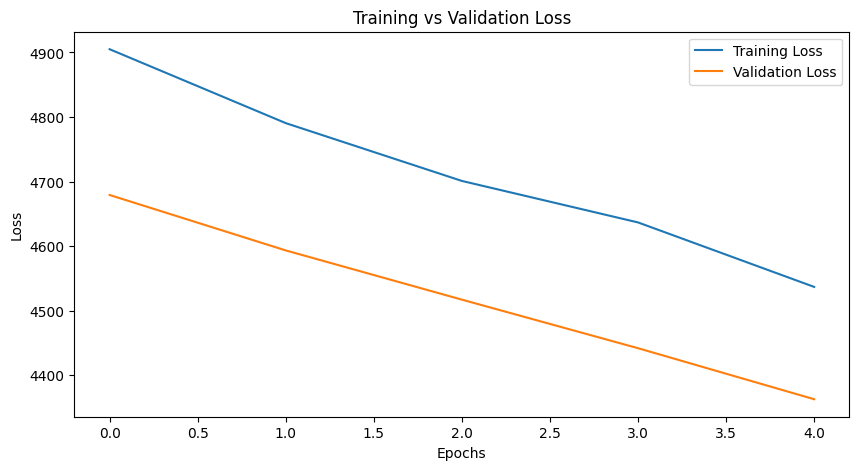

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
R² Score: -282.5930


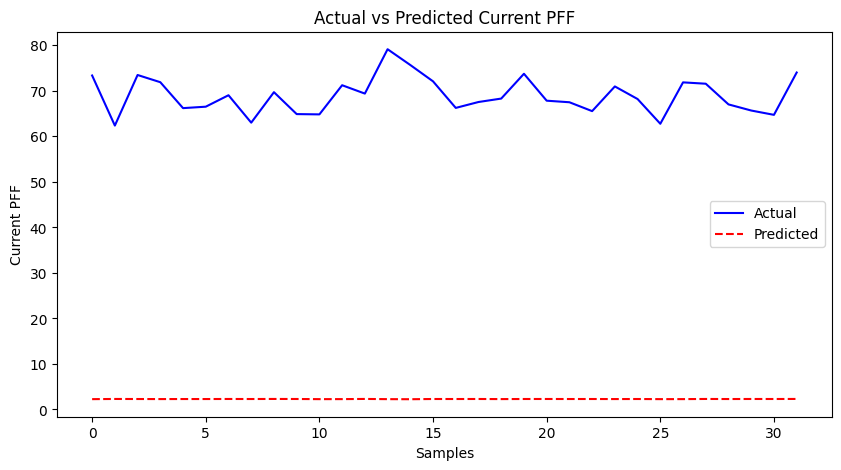

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 4474.5205 - val_loss: 4274.2500
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4418.1875 - val_loss: 4166.3042
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4258.3193 - val_loss: 4034.2910
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4124.7129 - val_loss: 3860.2693
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3953.7781 - val_loss: 3640.2209
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3640.5776 - val_loss: 3367.1765
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3485.2344 - val_loss: 3039.1919
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3164.9067 - val_loss: 2655.8325
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2603.5630 - val_loss: 2216.8901
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2272.7747 - val_loss: 1728.1962


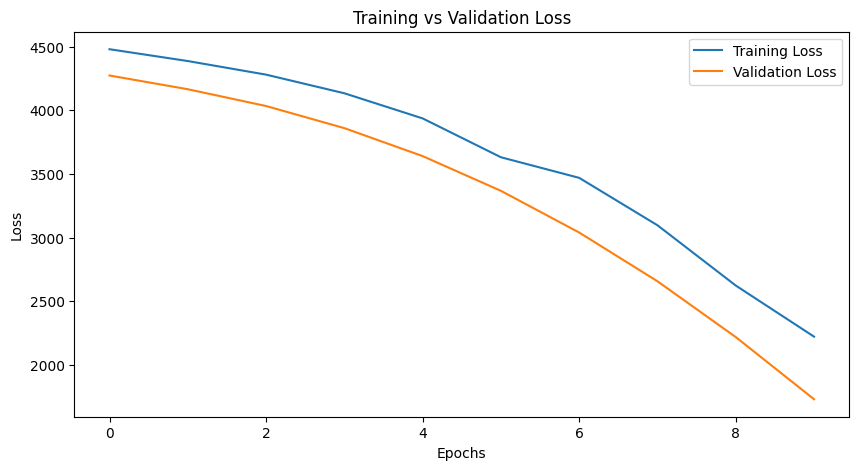

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
R² Score: -112.5254


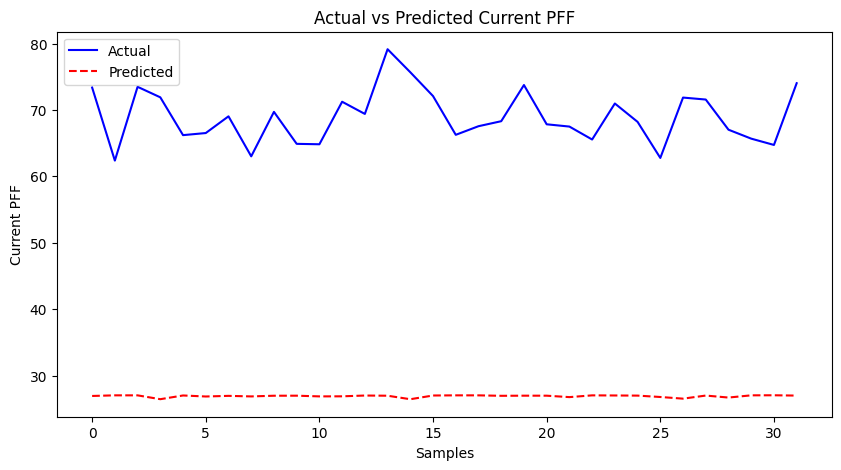

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1672.9658 - val_loss: 1211.2512
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1174.5721 - val_loss: 714.7323
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 894.7283 - val_loss: 307.0874
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 280.9947 - val_loss: 66.6120
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 171.6544 - val_loss: 21.2993
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 118.6112 - val_loss: 83.5577
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 133.2261 - val_loss: 109.6200
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 225.1152 - val_loss: 82.1083
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 120.6949 - val_loss: 34.7958
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 109.6104 - val_loss: 16.5664
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 82.8952 - val_loss: 16.1036
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/s

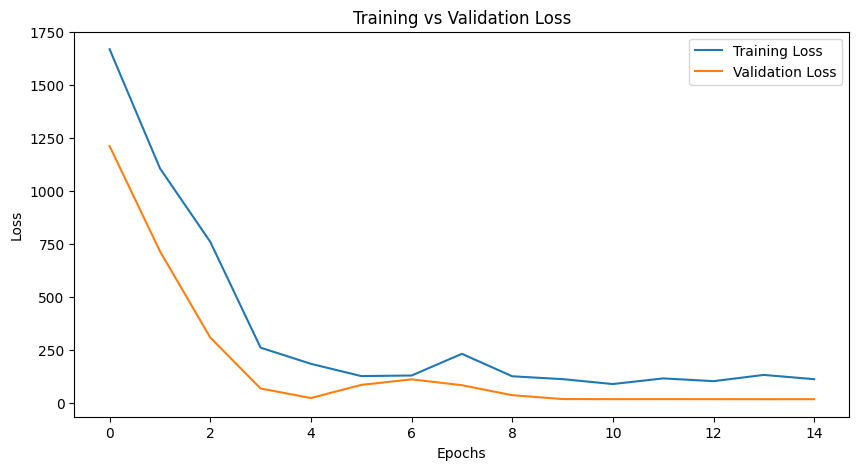

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
R² Score: -0.0869


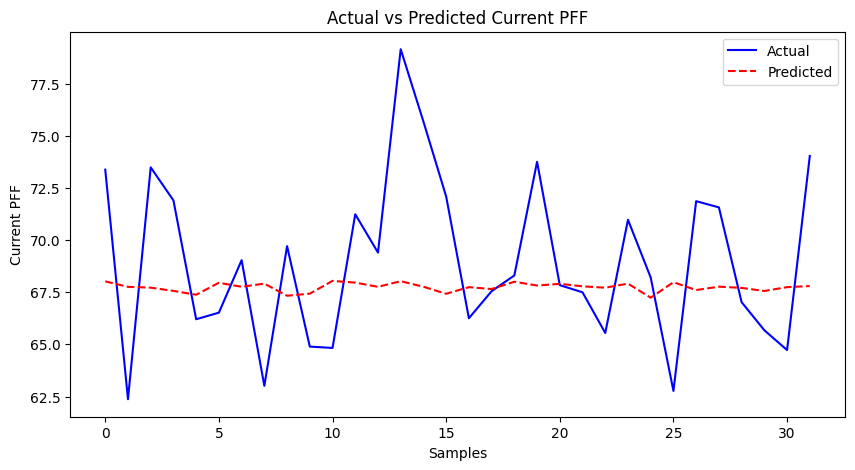

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 108.4453 - val_loss: 15.7117
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 95.1282 - val_loss: 17.1968
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 76.1754 - val_loss: 17.8976
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 106.1757 - val_loss: 16.4136
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 44.3091 - val_loss: 15.5436
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 123.5374 - val_loss: 16.3250
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 128.7306 - val_loss: 15.5167
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 82.3730 - val_loss: 15.5537
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 96.3396 - val_loss: 17.9437
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 150.3085 - val_loss: 24.9467
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 124.1173 - val_loss: 18.8956
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1

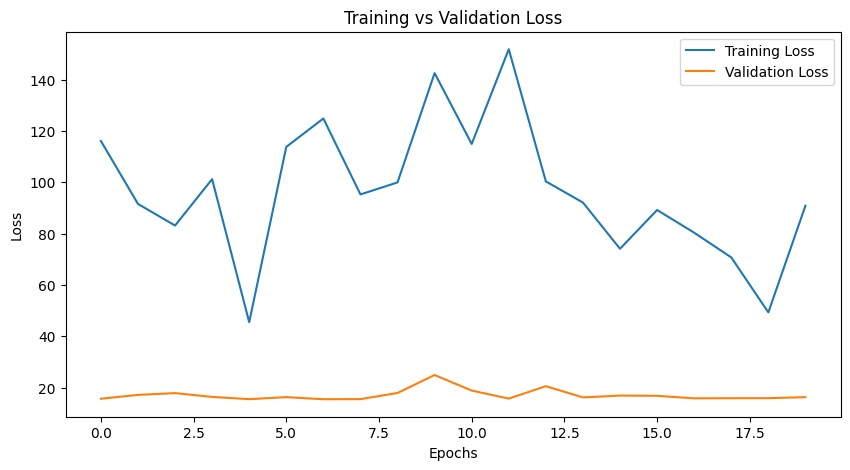

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
R² Score: -0.1012


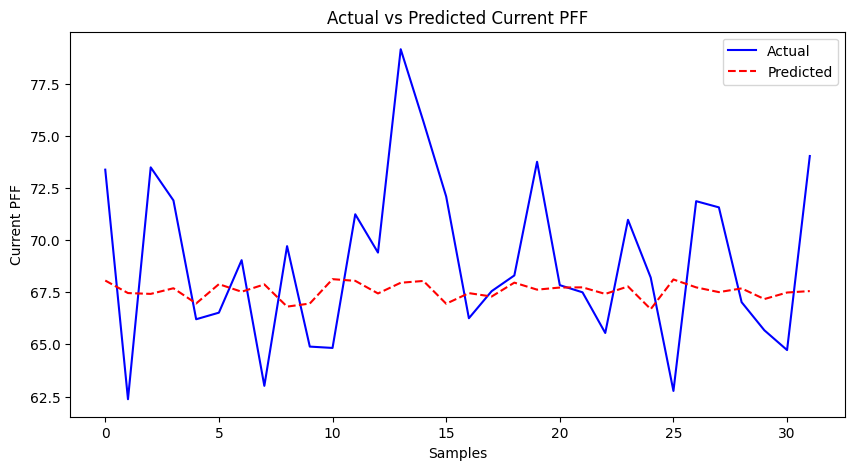

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 97.8970 - val_loss: 18.9803
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 71.3041 - val_loss: 21.7390
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 81.9935 - val_loss: 20.4619
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 90.9911 - val_loss: 16.7168
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 82.3254 - val_loss: 16.3558
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 93.8357 - val_loss: 19.2678
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 114.5765 - val_loss: 17.6183
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 67.2418 - val_loss: 16.0270
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 83.1081 - val_loss: 21.3565
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 92.7911 - val_loss: 33.7292
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 63.0522 - val_loss: 34.9113
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 109.

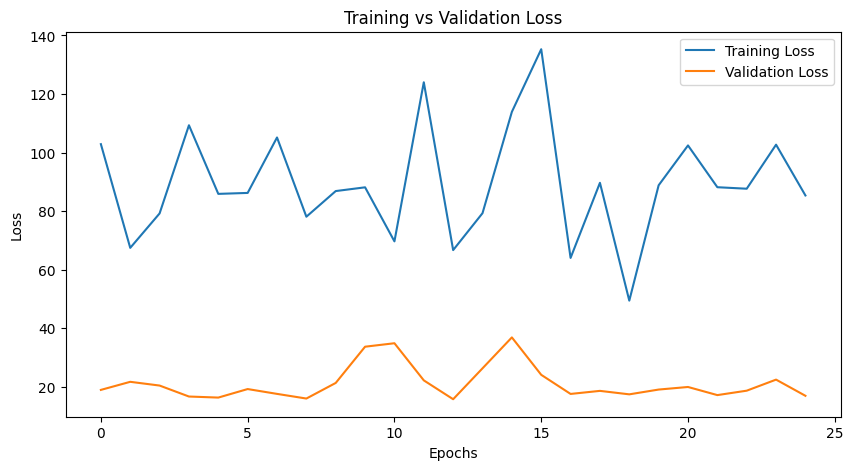

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
R² Score: 0.0059


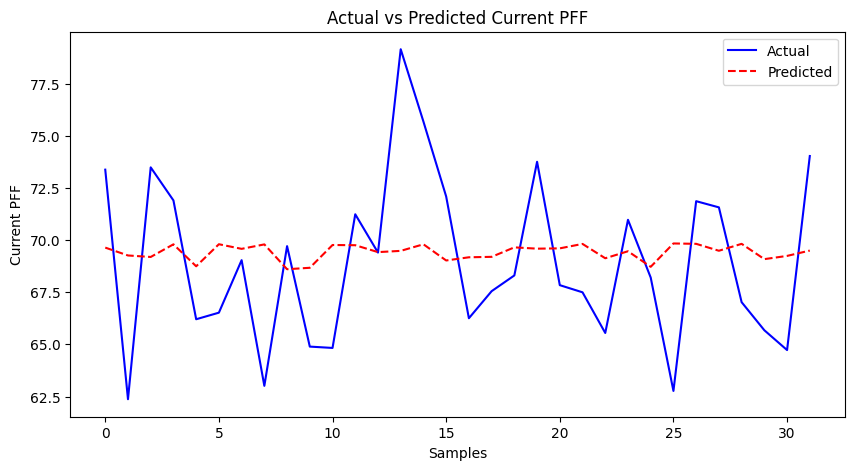

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 72.9498 - val_loss: 15.2809
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 71.0281 - val_loss: 16.0753
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 79.1179 - val_loss: 16.4856
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 63.4462 - val_loss: 17.3305
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 68.1367 - val_loss: 15.5615
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 115.4363 - val_loss: 15.7364
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 95.3495 - val_loss: 16.5695
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 81.2785 - val_loss: 16.1169
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 94.8467 - val_loss: 15.7941
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 56.8791 - val_loss: 15.7380
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 72.8147 - val_loss: 20.1401
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 139.

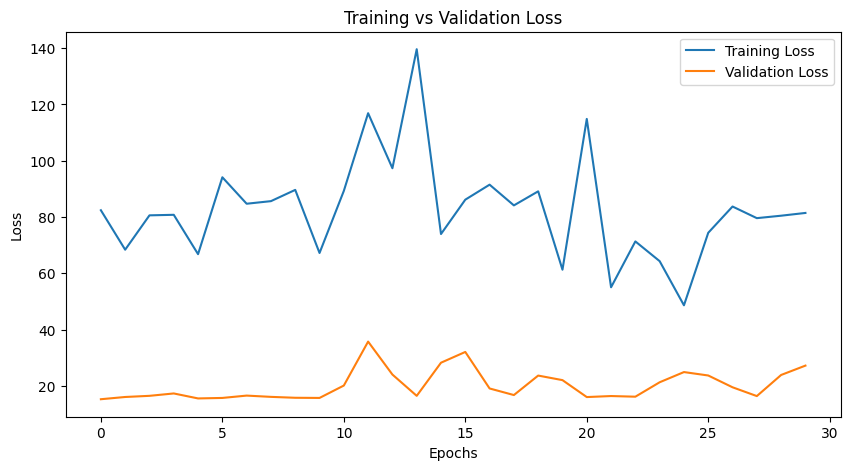

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
R² Score: -1.0343


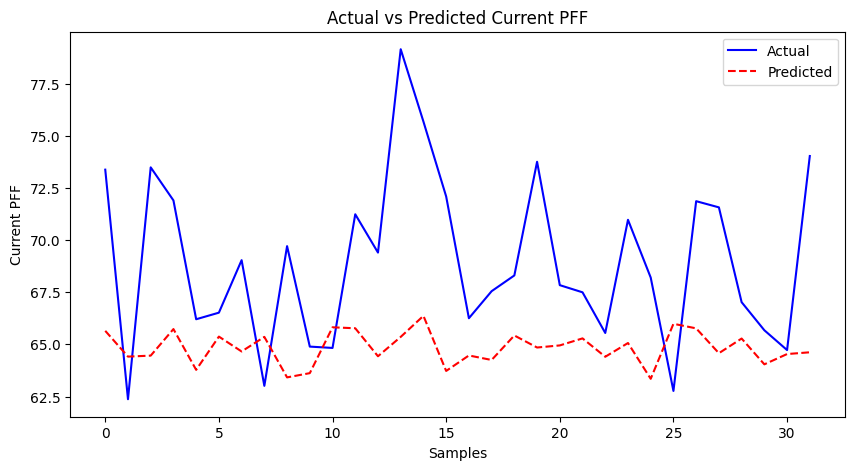

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 104.2079 - val_loss: 16.1812
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 93.1927 - val_loss: 25.3261
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41.0948 - val_loss: 24.2417
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 67.8752 - val_loss: 18.3190
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 106.2747 - val_loss: 15.8075
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 71.2210 - val_loss: 16.8134
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 79.1001 - val_loss: 19.5329
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 62.0002 - val_loss: 16.8711
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 79.4496 - val_loss: 16.1405
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 57.7818 - val_loss: 17.2708
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 62.5514 - val_loss: 20.6098
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 90.

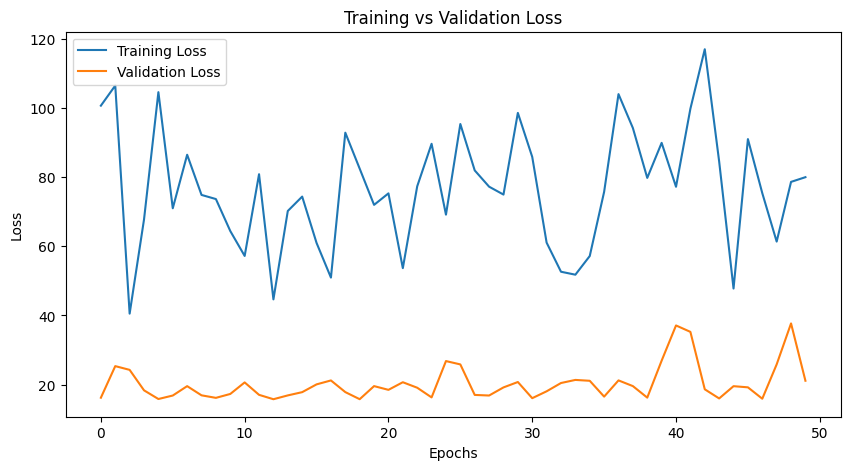

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
R² Score: -0.0928


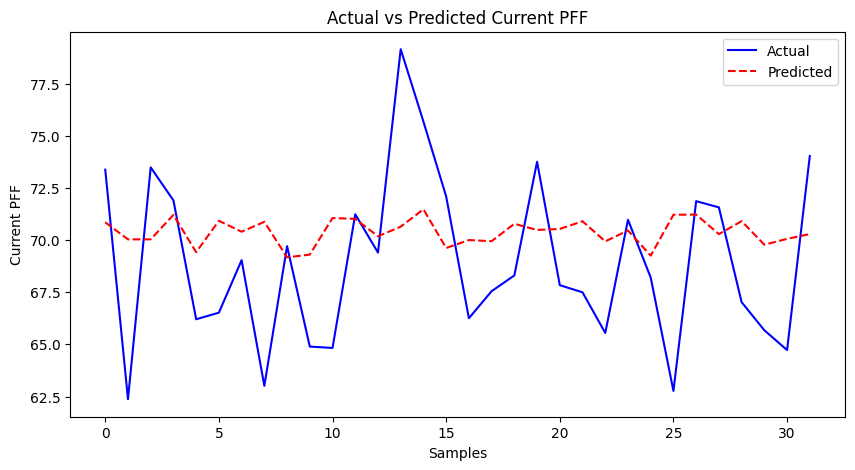

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 76.5181 - val_loss: 16.0172
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 72.0088 - val_loss: 17.9065
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 74.1985 - val_loss: 16.6903
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 50.3291 - val_loss: 17.3103
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 54.9667 - val_loss: 17.7722
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 68.8480 - val_loss: 16.1424
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 57.9402 - val_loss: 16.1717
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 81.8061 - val_loss: 16.5785
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 85.2558 - val_loss: 16.1471
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 64.0629 - val_loss: 17.0596
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 136.6513 - val_loss: 16.3055
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 

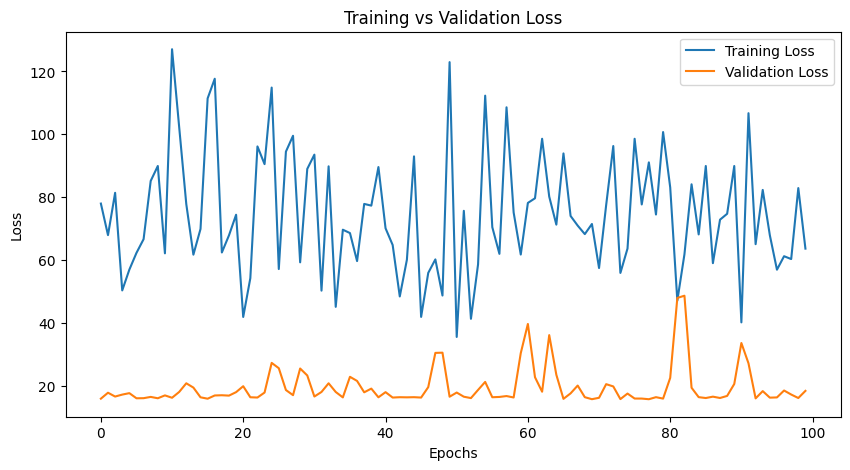

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
R² Score: 0.0115


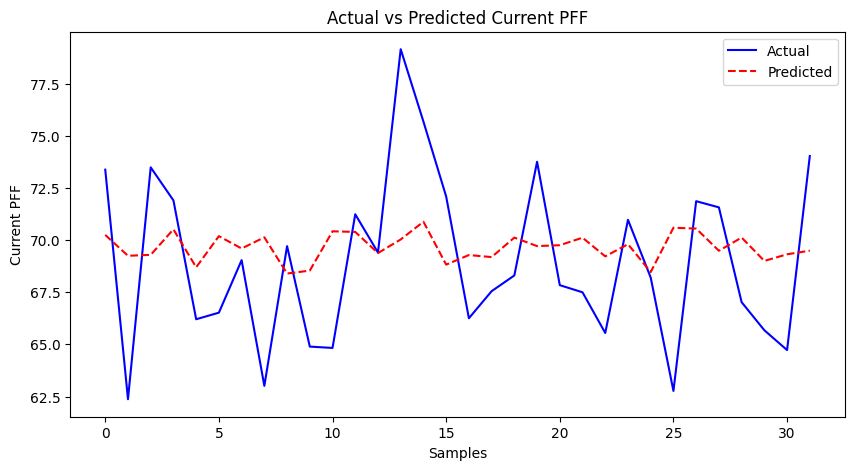

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 90.2744 - val_loss: 19.1274
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 43.4678 - val_loss: 20.4278
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 78.9640 - val_loss: 19.1391
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 76.7860 - val_loss: 16.2655
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 63.1777 - val_loss: 16.1190
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 47.4685 - val_loss: 17.0809
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 70.5972 - val_loss: 19.8899
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 87.2300 - val_loss: 27.1610
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 95.9345 - val_loss: 24.2212
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 63.0889 - val_loss: 18.5043
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 71.6948 - val_loss: 22.6121
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - l

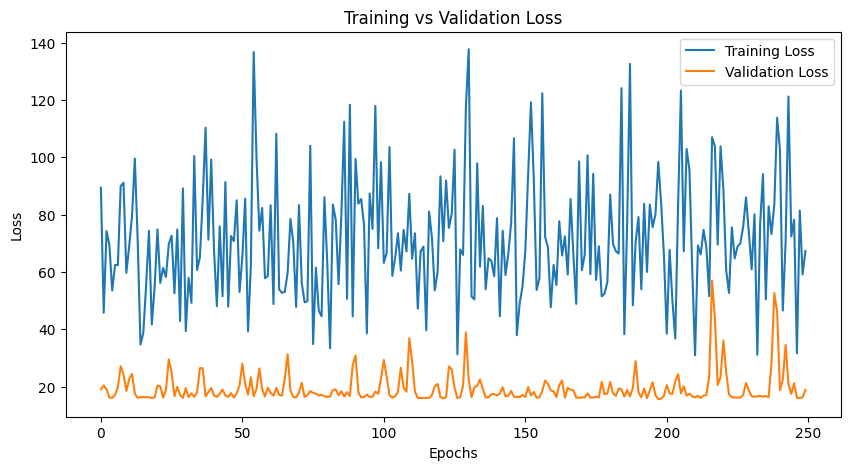

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
R² Score: -0.0129


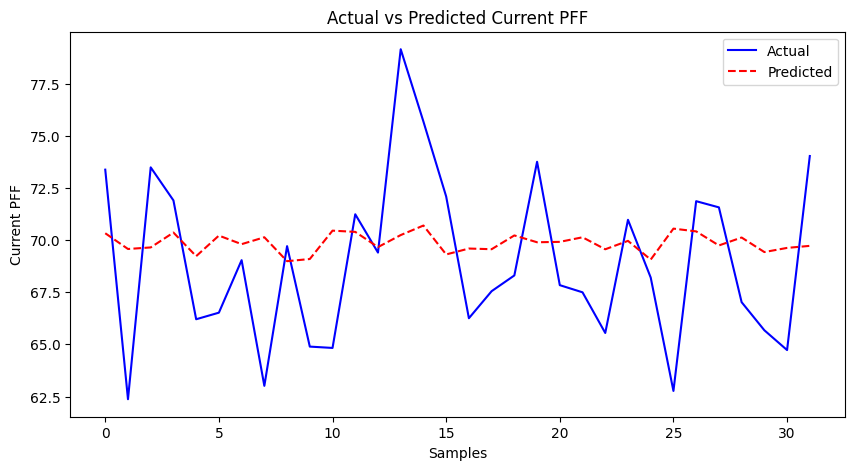

In [28]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()